# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Solihin
- **Email:** soleh.pekan2017@gmail.com
- **ID Dicoding:** MC223D5Y1069

## Menentukan Pertanyaan Bisnis



1. Produk apa yang paling banyak dibeli oleh pelanggan, dan bagaimana tren penjualannya dari waktu ke waktu?

2. Di wilayah mana saja pelanggan paling banyak melakukan pembelian?

3. Bagaimana hubungan antara rating review pelanggan dan jumlah pesanan ulang (repeat orders)?

4. Apakah keterlambatan pengiriman mempengaruhi rating ulasan pelanggan?



Import Semua Packages/Library yang Digunakan





In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib
import gdown

## Data Wrangling

### Gathering Data

Data yang digunakan adalah E-Commerce Public Dataset yang terdiri dari data geolocation, orders, order items, order reviews, customers, order payments, products, sellers, dan product category.




In [37]:
url_geoloc = "https://drive.google.com/uc?id=1rYMxelhTadgWY47zjoFZN3gslbEOZZj_"
gdown.download(url_geoloc, "geolocation_dataset.csv", quiet=False)
geolocation_df = pd.read_csv("geolocation_dataset.csv")
print(geolocation_df.head())

Downloading...
From: https://drive.google.com/uc?id=1rYMxelhTadgWY47zjoFZN3gslbEOZZj_
To: /content/geolocation_dataset.csv
100%|██████████| 61.3M/61.3M [00:00<00:00, 64.6MB/s]


   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP  


In [38]:
url_orders = "https://drive.google.com/uc?id=1xF5BlF2gKryr0UiJ4T1dyZk0Naf-irob"
gdown.download(url_orders, "orders.csv", quiet=False)
orders_df = pd.read_csv("orders.csv")
print(orders_df.head())

Downloading...
From: https://drive.google.com/uc?id=1xF5BlF2gKryr0UiJ4T1dyZk0Naf-irob
To: /content/orders.csv
100%|██████████| 17.7M/17.7M [00:00<00:00, 51.3MB/s]


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [39]:
url_order_items = "https://drive.google.com/uc?id=1bbiSGtezbR97_SXRg6r201u4IPM37-Yc"
gdown.download(url_order_items, "order_items.csv", quiet=False)
order_items_df = pd.read_csv("order_items.csv")
print(order_items_df.head())

Downloading...
From: https://drive.google.com/uc?id=1bbiSGtezbR97_SXRg6r201u4IPM37-Yc
To: /content/order_items.csv
100%|██████████| 15.4M/15.4M [00:00<00:00, 28.7MB/s]


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [40]:
url_order_reviews = "https://drive.google.com/uc?id=1sqmrpSC55RDMG1rSwmQOoxM0nt4uEYKY"
gdown.download(url_order_reviews, "order_reviews.csv", quiet=False)
order_reviews_df = pd.read_csv("order_reviews.csv")
print(order_reviews_df.head())

Downloading...
From: https://drive.google.com/uc?id=1sqmrpSC55RDMG1rSwmQOoxM0nt4uEYKY
To: /content/order_reviews.csv
100%|██████████| 14.5M/14.5M [00:00<00:00, 24.4MB/s]


                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [41]:
url_customers = "https://drive.google.com/uc?id=1JMWkiBoyfCOPGi5Th1CxMA2D7PCsvf8K"
gdown.download(url_customers, "customers.csv", quiet=False)
customers_df = pd.read_csv("customers.csv")
print(customers_df.head())

Downloading...
From: https://drive.google.com/uc?id=1JMWkiBoyfCOPGi5Th1CxMA2D7PCsvf8K
To: /content/customers.csv
100%|██████████| 9.03M/9.03M [00:00<00:00, 40.3MB/s]


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  


In [42]:
url_order_payments = "https://drive.google.com/uc?id=1G3jIWRXmlon5pej5-cktpIuL-vs65g6j"
gdown.download(url_order_payments, "order_payments.csv", quiet=False)
order_payments_df = pd.read_csv("order_payments.csv")
print(order_payments_df.head())

Downloading...
From: https://drive.google.com/uc?id=1G3jIWRXmlon5pej5-cktpIuL-vs65g6j
To: /content/order_payments.csv
100%|██████████| 5.78M/5.78M [00:00<00:00, 60.4MB/s]


                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [43]:
url_products = "https://drive.google.com/uc?id=1hsDHePmIcWb2qlyOIftgZQh-3UJCQbSy"
gdown.download(url_products, "products.csv", quiet=False)
products_df = pd.read_csv("products.csv")
print(products_df.head())

Downloading...
From: https://drive.google.com/uc?id=1hsDHePmIcWb2qlyOIftgZQh-3UJCQbSy
To: /content/products.csv
100%|██████████| 2.38M/2.38M [00:00<00:00, 31.6MB/s]

                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0       

In [44]:
url_sellers = "https://drive.google.com/uc?id=1AiJ90xua1lKpGPffAYBXEiaoAFkObd1b"
gdown.download(url_sellers, "sellers.csv", quiet=False)
sellers_df = pd.read_csv("sellers.csv")
print(sellers_df.head())

Downloading...
From: https://drive.google.com/uc?id=1AiJ90xua1lKpGPffAYBXEiaoAFkObd1b
To: /content/sellers.csv
100%|██████████| 175k/175k [00:00<00:00, 8.53MB/s]

                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP  


In [45]:
url_product_category = "https://drive.google.com/uc?id=1UOnHFNy4RaPlYxiereMlMfQgnXNVKimE"
gdown.download(url_product_category, "product_category.csv", quiet=False)
product_category_df = pd.read_csv("product_category.csv")
print(product_category_df.head())

Downloading...
From: https://drive.google.com/uc?id=1UOnHFNy4RaPlYxiereMlMfQgnXNVKimE
To: /content/product_category.csv
100%|██████████| 2.61k/2.61k [00:00<00:00, 8.79MB/s]

    product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor


**Insight:**
- xxx
- xxx

### Assessing Data

**Memeriksa data type pada setiap DataFrame**

In [46]:
print(geolocation_df.info(), "\n")
print(orders_df.info(), "\n")
print(order_items_df.info(), "\n")
print(order_reviews_df.info(), "\n")
print(customers_df.info(), "\n")
print(order_payments_df.info(), "\n")
print(products_df.info(), "\n")
print(sellers_df.info(), "\n")
print(product_category_df.info(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  ob

Memeriksa data null pada setiap DataFrame

In [47]:
print("Info data null pada geolocation: \n", geolocation_df.isna().sum(), "\n")
print("Info data null pada orders: \n", orders_df.isna().sum(), "\n")
print("Info data null pada order items: \n", order_items_df.isna().sum(), "\n")
print("Info data null pada order reviews: \n", order_reviews_df.isna().sum(), "\n")
print("Info data null pada customers: \n", customers_df.isna().sum(), "\n")
print("Info data null pada order payments: \n", order_payments_df.isna().sum(), "\n")
print("Info data null pada products: \n", products_df.isna().sum(), "\n")
print("Info data null pada sellers: \n", sellers_df.isna().sum(), "\n")
print("Info data null pada product category: \n", product_category_df.isna().sum(), "\n")

Info data null pada geolocation: 
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64 

Info data null pada orders: 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Info data null pada order items: 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

Info data null pada order reviews: 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_cr

Memeriksa data duplicate pada setiap DataFrame

In [48]:
print("Jumlah duplikasi geolocation: ", geolocation_df.duplicated().sum(), "\n")
print("Jumlah duplikasi orders: ", orders_df.duplicated().sum(), "\n")
print("Jumlah duplikasi order items: ", order_items_df.duplicated().sum(), "\n")
print("Jumlah duplikasi order reviews: ", order_reviews_df.duplicated().sum(), "\n")
print("Jumlah duplikasi customers: ", customers_df.duplicated().sum(), "\n")
print("Jumlah duplikasi order payments: ", order_payments_df.duplicated().sum(), "\n")
print("Jumlah duplikasi products: ", products_df.duplicated().sum(), "\n")
print("Jumlah duplikasi sellers: ", sellers_df.duplicated().sum(), "\n")
print("Jumlah duplikasi product category: ", product_category_df.duplicated().sum(), "\n")

Jumlah duplikasi geolocation:  261831 

Jumlah duplikasi orders:  0 

Jumlah duplikasi order items:  0 

Jumlah duplikasi order reviews:  0 

Jumlah duplikasi customers:  0 

Jumlah duplikasi order payments:  0 

Jumlah duplikasi products:  0 

Jumlah duplikasi sellers:  0 

Jumlah duplikasi product category:  0 



Describe semua DataFrame

In [49]:
print("Data describe geolocation:\n", geolocation_df.describe(include="all"), "\n")
print("Data describe orders:\n", orders_df.describe(include="all"), "\n")
print("Data describe order items:\n", order_items_df.describe(include="all"), "\n")
print("Data describe order reviews:\n", order_reviews_df.describe(include="all"), "\n")
print("Data describe customers:\n", customers_df.describe(include="all"), "\n")
print("Data describe order payments:\n", order_payments_df.describe(include="all"), "\n")
print("Data describe products:\n", products_df.describe(include="all"), "\n")
print("Data describe sellers:\n", sellers_df.describe(include="all"), "\n")
print("Data describe product category:\n", product_category_df.describe(include="all"), "\n")

Data describe geolocation:
         geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
count                  1.000163e+06     1.000163e+06     1.000163e+06   
unique                          NaN              NaN              NaN   
top                             NaN              NaN              NaN   
freq                            NaN              NaN              NaN   
mean                   3.657417e+04    -2.117615e+01    -4.639054e+01   
std                    3.054934e+04     5.715866e+00     4.269748e+00   
min                    1.001000e+03    -3.660537e+01    -1.014668e+02   
25%                    1.107500e+04    -2.360355e+01    -4.857317e+01   
50%                    2.653000e+04    -2.291938e+01    -4.663788e+01   
75%                    6.350400e+04    -1.997962e+01    -4.376771e+01   
max                    9.999000e+04     4.506593e+01     1.211054e+02   

       geolocation_city geolocation_state  
count           1000163           1000163  
unique 

**Insight:**
- Berdasarkan pemeriksaan data type dapat dilihat bahwa terdapat kesalahan data type pada DataFrame orders di kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date yang seharusnya memiliki data type berupa datetime tetapi di DataFrame tersebut data type adalah object. Terdapat kesalahan yang sama di DataFrame order_items di kolom shipping_limit_date dan pada DataFrame order_revs di kolom review_creation_date. Ketidaksesuaian data type ini akan diperbaiki di data cleaning.

- Berdasarkan hasil pemeriksaan data null terlihat bahwa terdapat data null pada DataFrame orders di kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Pada DataFrame order_revs terdapat data null pada kolom review_comment_title, dan review_comment_message. Pada DataFrame products terdapat data null pada kolom product_category_name, product_name_length, product_description_length, product_photos_qt, product_weight_g, product_length_cm, product_height_cm, dan product_width_cm

- Berdasarkan pemeriksaan duplikasi data terdapat duplikasi data pada geolocation dengan jumlah duplikasi geolocation:  261836

### Cleaning Data

Ubah tipe data ke datetime

In [50]:
# Ubah tipe data ke datetime
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_approved_at"] = pd.to_datetime(orders_df["order_approved_at"])
orders_df["order_delivered_carrier_date"] = pd.to_datetime(orders_df["order_delivered_carrier_date"])
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"])

order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])
order_reviews_df["review_creation_date"] = pd.to_datetime(order_reviews_df["review_creation_date"])

# Cek apakah perubahan berhasil
print("Jumlah kolom datetime di orders:", orders_df.select_dtypes(include=['datetime']).shape[1])
print("Jumlah kolom datetime di order_items_df:", order_items_df.select_dtypes(include=['datetime']).shape[1])
print("Jumlah kolom datetime di order_reviews_df:", order_reviews_df.select_dtypes(include=['datetime']).shape[1])

Jumlah kolom datetime di orders: 5
Jumlah kolom datetime di order_items_df: 1
Jumlah kolom datetime di order_reviews_df: 1


In [53]:
# Sebelum cleaning
print("Jumlah missing values sebelum cleaning:")
print(orders_df.isnull().sum())
print(order_reviews_df.isnull().sum())
print(products_df.isnull().sum())

# Isi missing values dengan kategori "Unknown" atau median
orders_df["order_approved_at"].fillna("Unknown", inplace=True)
orders_df["order_delivered_carrier_date"].fillna("Unknown", inplace=True)
orders_df["order_delivered_customer_date"].fillna("Unknown", inplace=True)

order_reviews_df["review_comment_title"].fillna("", inplace=True)
order_reviews_df["review_comment_message"].fillna("", inplace=True)

products_df["product_category_name"].fillna("Unknown", inplace=True)
num_cols = ["product_name_lenght", "product_description_lenght", "product_photos_qty",
            "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"]
for col in num_cols:
    products_df[col].fillna(products_df[col].median(), inplace=True)

# Setelah cleaning
print("\nJumlah missing values setelah cleaning:")
print(orders_df.isnull().sum())
print(order_reviews_df.isnull().sum())
print(products_df.isnull().sum())

Jumlah missing values sebelum cleaning:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Jumlah missing values setelah cleaning:
order_id                         0
customer_id                 

<ipython-input-53-f419105fbb96>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_df["review_comment_title"].fillna("", inplace=True)
<ipython-input-53-f419105fbb96>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

Menghapus duplikasi data geoloc

In [52]:
geolocation_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi geoloc: ", geolocation_df.duplicated().sum())

Jumlah duplikasi geoloc:  0


**Insight:**

- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

### Pertanyaan 1: Produk apa yang paling banyak dibeli oleh pelanggan, dan bagaimana tren penjualannya dari waktu ke waktu?

In [57]:
# 1. Hitung jumlah pembelian per produk
top_products = order_items_df["product_id"].value_counts().reset_index()
top_products.columns = ["product_id", "total_orders"]

# 2. Hubungkan dengan kategori produk
top_products = top_products.merge(products_df[["product_id", "product_category_name"]], on="product_id", how="left")

# 3. Ambil 10 produk terlaris
top_10_products = top_products.head(10)

# 4. Tampilkan hasil summary
print("Total jumlah produk unik yang terjual:", order_items_df["product_id"].nunique())
print("Total transaksi:", len(order_items_df))
print("\n10 Produk Terlaris:\n", top_10_products)

# 5. Cek tren penjualan dari waktu ke waktu
orders_df["order_purchase_timestamp"] = pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["order_month"] = orders_df["order_purchase_timestamp"].dt.to_period("M")
monthly_sales = orders_df.groupby("order_month").size().reset_index(name="total_orders")

# 6. Tampilkan summary tren
print("\nRata-rata pesanan per bulan:", round(monthly_sales["total_orders"].mean()))
print("Total pesanan sepanjang waktu:", monthly_sales["total_orders"].sum())

Total jumlah produk unik yang terjual: 32951
Total transaksi: 112650

10 Produk Terlaris:
                          product_id  total_orders   product_category_name
0  aca2eb7d00ea1a7b8ebd4e68314663af           527        moveis_decoracao
1  99a4788cb24856965c36a24e339b6058           488         cama_mesa_banho
2  422879e10f46682990de24d770e7f83d           484      ferramentas_jardim
3  389d119b48cf3043d311335e499d9c6b           392      ferramentas_jardim
4  368c6c730842d78016ad823897a372db           388      ferramentas_jardim
5  53759a2ecddad2bb87a079a1f1519f73           373      ferramentas_jardim
6  d1c427060a0f73f6b889a5c7c61f2ac4           343  informatica_acessorios
7  53b36df67ebb7c41585e8d54d6772e08           323      relogios_presentes
8  154e7e31ebfa092203795c972e5804a6           281            beleza_saude
9  3dd2a17168ec895c781a9191c1e95ad7           274  informatica_acessorios

Rata-rata pesanan per bulan: 3978
Total pesanan sepanjang waktu: 99441


### Pertanyaan 2 :Di wilayah mana saja pelanggan paling banyak melakukan pembelian?

In [58]:
# 1. Hitung jumlah pesanan berdasarkan kota pelanggan
top_cities = customers_df["customer_city"].value_counts().reset_index()
top_cities.columns = ["customer_city", "total_orders"]

# 2. Ambil 10 kota dengan pembelian terbanyak
top_10_cities = top_cities.head(10)

# 3. Tampilkan hasil summary
print("Total kota unik dengan pembelian:", customers_df["customer_city"].nunique())
print("Total transaksi:", len(customers_df))
print("\n10 Kota dengan Pembelian Terbanyak:\n", top_10_cities)

Total kota unik dengan pembelian: 4119
Total transaksi: 99441

10 Kota dengan Pembelian Terbanyak:
            customer_city  total_orders
0              sao paulo         15540
1         rio de janeiro          6882
2         belo horizonte          2773
3               brasilia          2131
4               curitiba          1521
5               campinas          1444
6           porto alegre          1379
7               salvador          1245
8              guarulhos          1189
9  sao bernardo do campo           938


### Pertanyaan 3: Bagaimana hubungan antara rating review pelanggan dan jumlah pesanan ulang (repeat orders)?

In [59]:
# 1. Hitung jumlah pesanan ulang per pelanggan
repeat_orders = customers_df["customer_unique_id"].value_counts().reset_index()
repeat_orders.columns = ["customer_unique_id", "repeat_orders"]

# 2. Gabungkan dengan dataset order_reviews berdasarkan order_id
orders_reviews = orders_df[["order_id", "customer_id"]].merge(order_reviews_df[["order_id", "review_score"]], on="order_id")
orders_reviews = orders_reviews.merge(customers_df[["customer_id", "customer_unique_id"]], on="customer_id")
orders_reviews = orders_reviews.merge(repeat_orders, on="customer_unique_id")

# 3. Hitung statistik hubungan rating dan repeat orders
review_repeat_summary = orders_reviews.groupby("review_score")["repeat_orders"].agg(["count", "mean", "sum"]).reset_index()

# 4. Tampilkan summary
print("Total jumlah ulasan:", len(orders_reviews))
print("\nStatistik Repeat Orders berdasarkan Review Score:\n", review_repeat_summary)

Total jumlah ulasan: 99224

Statistik Repeat Orders berdasarkan Review Score:
    review_score  count      mean    sum
0             1  11424  1.076418  12297
1             2   3151  1.076166   3391
2             3   8179  1.083507   8862
3             4  19142  1.071309  20507
4             5  57328  1.090863  62537


### Pertanyaan 4 :Apakah keterlambatan pengiriman mempengaruhi rating ulasan pelanggan?

In [61]:
# 1. Hitung keterlambatan pengiriman
orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].replace("Unknown", pd.NaT)
orders_df["order_delivered_customer_date"] = pd.to_datetime(orders_df["order_delivered_customer_date"])

orders_df["order_estimated_delivery_date"] = orders_df["order_estimated_delivery_date"].replace("Unknown", pd.NaT)
orders_df["order_estimated_delivery_date"] = pd.to_datetime(orders_df["order_estimated_delivery_date"])

orders_df["delay"] = (orders_df["order_delivered_customer_date"] > orders_df["order_estimated_delivery_date"]).astype(int)

# 2. Gabungkan dengan rating ulasan pelanggan
delivery_reviews = orders_df[["order_id", "delay"]].merge(order_reviews_df[["order_id", "review_score"]], on="order_id")

# 3. Hitung statistik keterlambatan vs rating
delay_review_summary = delivery_reviews.groupby("delay")["review_score"].agg(["count", "mean", "std"]).reset_index()

# 4. Tampilkan summary
print("Total jumlah pesanan:", len(orders_df))
print("\nJumlah pesanan yang terlambat dikirim:", orders_df["delay"].sum())
print("\nStatistik Rating Berdasarkan Status Keterlambatan:\n", delay_review_summary)

<ipython-input-61-e543e992160f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  orders_df["order_delivered_customer_date"] = orders_df["order_delivered_customer_date"].replace("Unknown", pd.NaT)


Total jumlah pesanan: 99441

Jumlah pesanan yang terlambat dikirim: 7827

Statistik Rating Berdasarkan Status Keterlambatan:
    delay  count      mean       std
0      0  91523  4.214307  1.235597
1      1   7701  2.566550  1.658240


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dibeli oleh pelanggan, dan bagaimana tren penjualannya dari waktu ke waktu?

<ipython-input-64-9212ec12a19f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x="total_orders", y="product_category_name", palette="Blues_r")


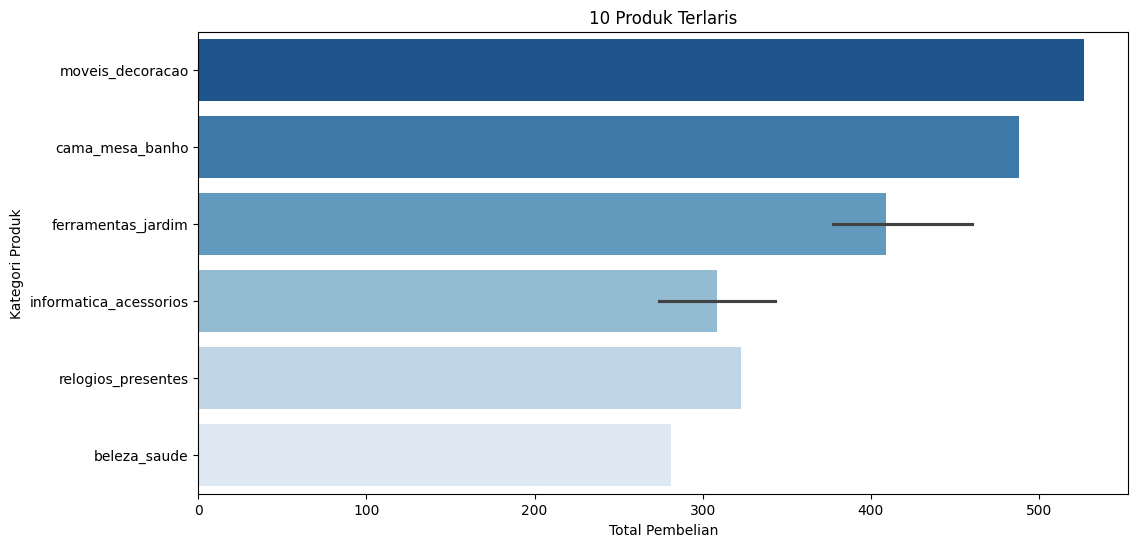

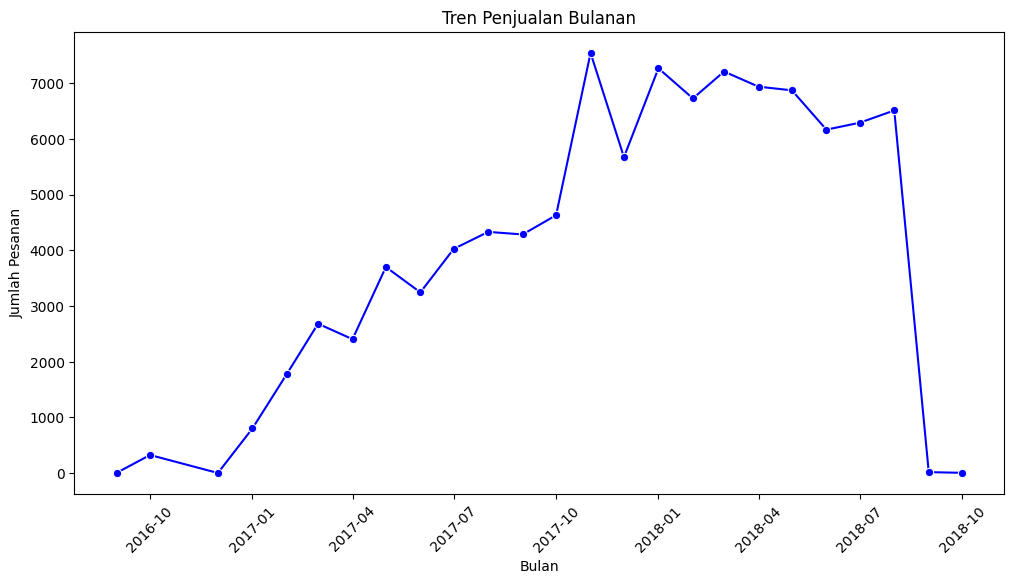

In [64]:
# Visualisasi 10 Produk Terlaris
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x="total_orders", y="product_category_name", palette="Blues_r")
plt.xlabel("Total Pembelian")
plt.ylabel("Kategori Produk")
plt.title("10 Produk Terlaris")
plt.show()

# Visualisasi Tren Penjualan dari Waktu ke Waktu
plt.figure(figsize=(12, 6))
monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()
sns.lineplot(data=monthly_sales, x="order_month", y="total_orders", marker="o", color="blue")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Tren Penjualan Bulanan")
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2 :Di wilayah mana saja pelanggan paling banyak melakukan pembelian?

<ipython-input-65-c48af710cd81>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_cities, x="total_orders", y="customer_city", palette="Greens_r")


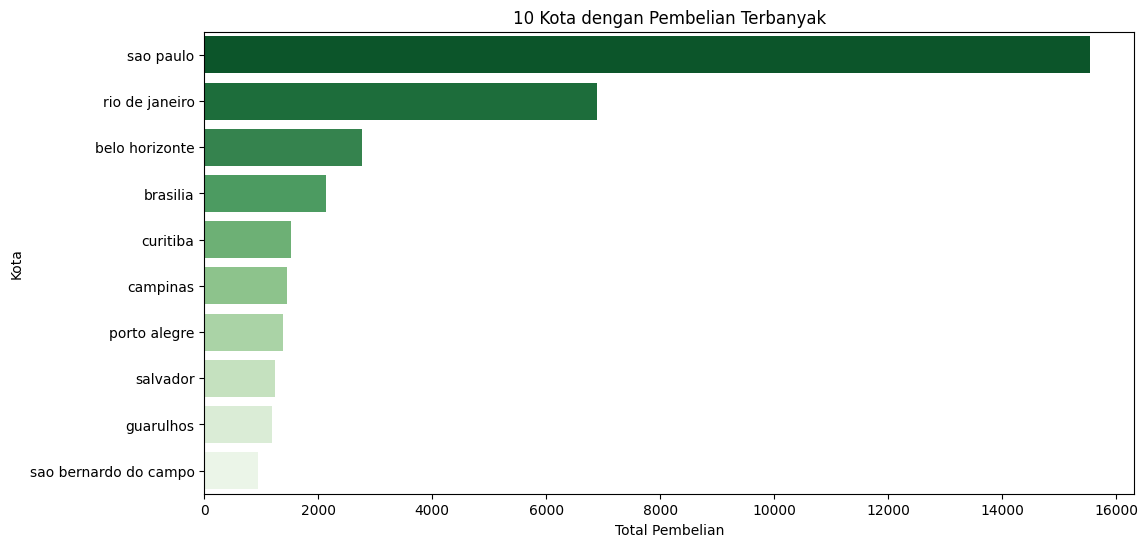

In [65]:
# Visualisasi 10 Kota dengan Pembelian Terbanyak
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_cities, x="total_orders", y="customer_city", palette="Greens_r")
plt.xlabel("Total Pembelian")
plt.ylabel("Kota")
plt.title("10 Kota dengan Pembelian Terbanyak")
plt.show()

### Pertanyaan 3: Bagaimana hubungan antara rating review pelanggan dan jumlah pesanan ulang (repeat orders)?

<ipython-input-66-b9defcf2634c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review_repeat_summary, x="review_score", y="mean", palette="Oranges_r")


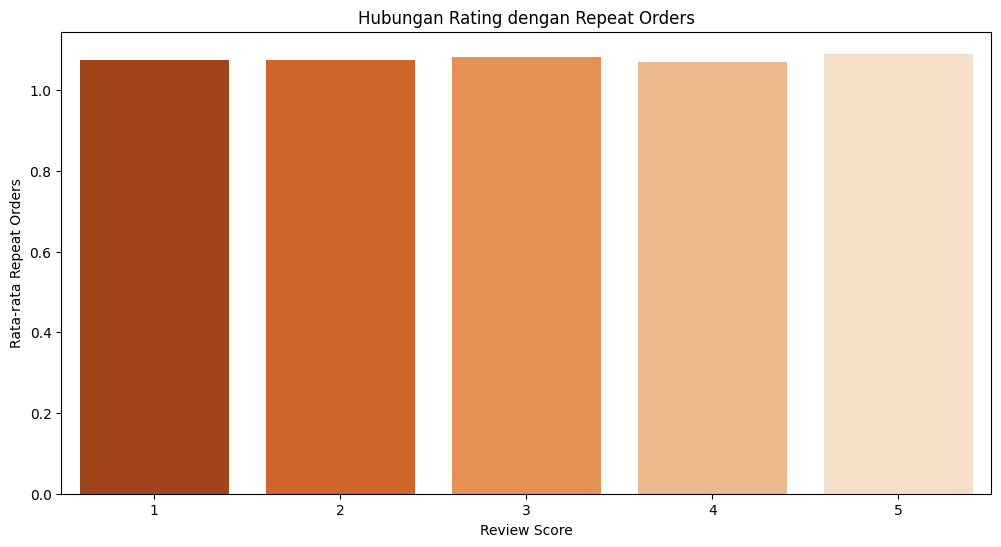

In [66]:
# Visualisasi Rating vs Repeat Orders
plt.figure(figsize=(12, 6))
sns.barplot(data=review_repeat_summary, x="review_score", y="mean", palette="Oranges_r")
plt.xlabel("Review Score")
plt.ylabel("Rata-rata Repeat Orders")
plt.title("Hubungan Rating dengan Repeat Orders")
plt.show()

### Pertanyaan 4 :Apakah keterlambatan pengiriman mempengaruhi rating ulasan pelanggan?

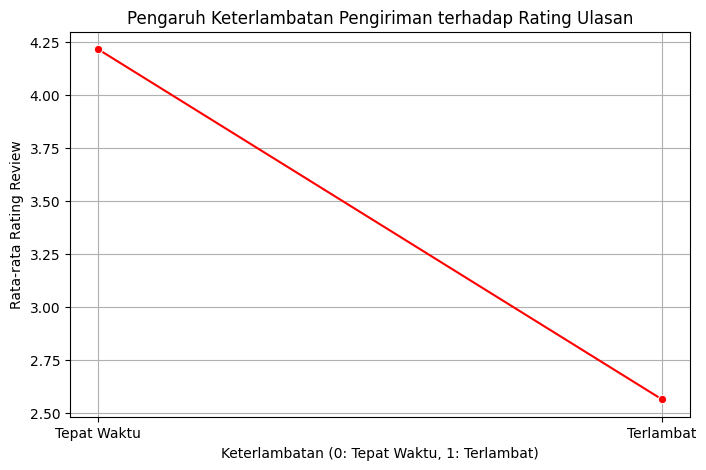

In [68]:
# Line Chart: Keterlambatan vs Rata-rata Rating Review
delay_rating = delivery_reviews.groupby("delay")["review_score"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=delay_rating, x="delay", y="review_score", marker="o", color="red")
plt.xlabel("Keterlambatan (0: Tepat Waktu, 1: Terlambat)")
plt.ylabel("Rata-rata Rating Review")
plt.title("Pengaruh Keterlambatan Pengiriman terhadap Rating Ulasan")
plt.xticks(ticks=[0, 1], labels=["Tepat Waktu", "Terlambat"])
plt.grid(True)
plt.show()

**Insight:**

*Pertanyaan 1*:
- Grafik produk terlaris menunjukkan kategori produk yang paling banyak dibeli oleh pelanggan. Dari visualisasi tersebut, kategori "moveis_decoracao" (furniture dan dekorasi) menjadi produk yang paling laris, diikuti oleh "cama_mesa_banho" (peralatan tempat tidur dan kamar mandi) serta "ferramentas_jardim" (perkakas taman). Hal ini menunjukkan bahwa pelanggan memiliki minat yang tinggi terhadap produk-produk rumah tangga dan dekorasi Kategori seperti "informatica_acessorios" (aksesoris komputer), "relogios_presentes" (jam tangan & hadiah), dan "beleza_saude" (kecantikan & kesehatan) juga cukup diminati, tetapi jumlah pembeliannya lebih sedikit dibandingkan dengan tiga kategori teratas.
- Grafik  jumlah pesanan dari waktu ke waktu menunjukkan pola pertumbuhan dan perubahan tren pembelian. Dari grafik, terlihat bahwa tren penjualan mengalami peningkatan signifikan mulai dari awal 2017 hingga pertengahan 2018. Puncak penjualan terjadi sekitar akhir 2017 hingga awal 2018, yang mungkin disebabkan oleh musim liburan atau promosi tertentu. Setelah puncak tersebut, jumlah pesanan cenderung stabil tetapi mengalami sedikit penurunan menjelang pertengahan 2018. Penurunan tajam di akhir grafik kemungkinan disebabkan oleh kurangnya data yang tersedia untuk bulan-bulan terakhir dalam dataset. Secara keseluruhan, pola ini menunjukkan adanya musim puncak penjualan dan tren pertumbuhan yang positif dalam jangka waktu tertentu.

*Pertanyaan 2*:
- Grafik menunjukkan 10 kota dengan jumlah pembelian terbanyak dalam dataset e-commerce. Sao Paulo mendominasi dengan selisih yang signifikan dibandingkan kota lain, mencerminkan perannya sebagai pusat ekonomi terbesar di Brasil dengan aktivitas e-commerce yang tinggi. Di posisi kedua, Rio de Janeiro juga memiliki jumlah pembelian besar, meskipun masih jauh di bawah Sao Paulo. Kota-kota lain seperti Belo Horizonte, Brasilia, Curitiba, Campinas, Porto Alegre, Salvador, Guarulhos, dan Sao Bernardo do Campo memiliki jumlah pembelian yang lebih rendah tetapi tetap masuk dalam daftar 10 besar.

- Dari tren yang terlihat, dominasi kota-kota besar seperti Sao Paulo dan Rio de Janeiro menunjukkan bahwa e-commerce lebih berkembang di pusat metropolitan dibandingkan daerah kecil. Kota seperti Belo Horizonte dan Brasilia juga menunjukkan aktivitas belanja online yang cukup tinggi, kemungkinan karena faktor populasi dan daya beli masyarakat. Sebaliknya, kota-kota dengan jumlah pembelian lebih sedikit mungkin memiliki populasi yang lebih kecil atau infrastruktur logistik yang belum sebaik kota-kota besar.

- Dari perspektif bisnis, data ini dapat dimanfaatkan untuk menentukan strategi pemasaran dan ekspansi. Perusahaan dapat lebih fokus pada kota dengan permintaan tinggi seperti Sao Paulo dan Rio de Janeiro untuk meningkatkan penjualan. Selain itu, strategi pemasaran yang lebih agresif bisa diterapkan di kota-kota dengan pembelian sedang untuk meningkatkan adopsi e-commerce di wilayah tersebut. Selain itu, perusahaan juga bisa menggunakan data ini untuk mengoptimalkan rantai pasok dan distribusi, memastikan pengiriman yang lebih efisien di wilayah dengan volume transaksi tinggi.

*Pertanyaan 3*:
- Grafik hubungan antara rating review menunjukkan rata-rata repeat orders dalam e-commerce. Dari grafik, terlihat bahwa rata-rata repeat orders relatif stabil di semua tingkat rating, dengan perbedaan yang sangat kecil antara rating 1 hingga 5. Hal ini menunjukkan bahwa rating review dari pelanggan tidak memiliki dampak signifikan terhadap kecenderungan mereka untuk melakukan repeat order.

- Biasanya, kita mengharapkan bahwa pelanggan yang memberikan rating tinggi (misalnya 4 atau 5) akan lebih cenderung melakukan repeat orders dibandingkan pelanggan yang memberikan rating rendah (1 atau 2). Namun, data ini menunjukkan pola yang berbeda, di mana pelanggan dengan rating rendah juga memiliki rata-rata repeat orders yang hampir sama dengan pelanggan dengan rating tinggi.

*Pertanyaan 4*:

- Grafik menunjukkan pengaruh keterlambatan pengiriman terhadap rata-rata rating ulasan pelanggan. Terlihat bahwa pesanan yang dikirim tepat waktu memiliki rata-rata rating review sekitar 4.25, sedangkan pesanan yang mengalami keterlambatan memiliki rata-rata rating yang jauh lebih rendah, sekitar 2.5.

- Dari hasil ini, dapat disimpulkan bahwa keterlambatan pengiriman berpengaruh signifikan terhadap kepuasan pelanggan, yang tercermin dalam penurunan rating ulasan. Pelanggan yang menerima pesanan tepat waktu cenderung memberikan ulasan lebih positif, sedangkan mereka yang mengalami keterlambatan pengiriman cenderung memberikan ulasan lebih negatif.

## Conclusion

Pertanyaan 1:

Berdasarkan analisis kategori produk terlaris, dapat disimpulkan bahwa pelanggan cenderung membeli produk rumah tangga dan dekorasi, dengan kategori **furniture & dekorasi, peralatan tempat tidur & kamar mandi, serta perkakas taman** menjadi yang paling diminati. Hal ini menunjukkan adanya permintaan tinggi untuk produk-produk yang berkaitan dengan kebutuhan rumah. Selain itu, tren jumlah pesanan dari waktu ke waktu menunjukkan **peningkatan signifikan dari awal 2017 hingga puncaknya di akhir 2017 hingga awal 2018**, yang kemungkinan besar dipengaruhi oleh musim liburan atau promosi. Setelah periode tersebut, jumlah pesanan cenderung stabil dengan sedikit penurunan menjelang pertengahan 2018.

Pertanyaan 2:

Distribusi jumlah pembelian berdasarkan kota menunjukkan bahwa **Sao Paulo** mendominasi e-commerce dengan selisih yang signifikan dibandingkan kota lain, disusul oleh R**io de Janeiro **dan beberapa kota besar lainnya seperti **Belo Horizonte, Brasilia, dan Curitiba**. Hal ini mencerminkan bahwa e-commerce lebih berkembang di kota metropolitan dengan infrastruktur dan daya beli yang lebih tinggi. Dari perspektif bisnis, pemetaan ini dapat digunakan untuk mengarahkan strategi pemasaran dan ekspansi, dengan fokus pada kota-kota yang memiliki permintaan tinggi serta optimalisasi rantai pasok untuk meningkatkan efisiensi pengiriman.

Pertanyaan 3:

Hasil analisis menunjukkan bahwa tidak ada korelasi yang signifikan antara **rating review pelanggan dengan repeat orders**. Rata-rata repeat orders relatif stabil di semua tingkat rating, yang menunjukkan bahwa pelanggan tetap melakukan pembelian ulang meskipun mereka memberikan rating rendah. Ini bisa mengindikasikan bahwa faktor lain, seperti harga, kualitas produk, atau kebutuhan mendesak, lebih berpengaruh terhadap keputusan pelanggan untuk melakukan repeat orders dibandingkan rating yang mereka berikan pada pembelian sebelumnya.

Pertanyaan 4:

Keterlambatan pengiriman terbukti memiliki dampak signifikan terhadap kepuasan pelanggan, sebagaimana ditunjukkan oleh penurunan drastis rating ulasan ketika pesanan mengalami keterlambatan. Pesanan yang dikirim **tepat waktu** mendapatkan rata-rata rating** 4.25**, sedangkan pesanan **terlambat** hanya mendapatkan rating sekitar **2.5**. Hal ini menunjukkan bahwa pelanggan sangat menghargai ketepatan waktu dalam pengiriman, dan keterlambatan dapat menyebabkan ketidakpuasan yang cukup besar. Oleh karena itu, bagi bisnis e-commerce, memastikan pengiriman tepat waktu adalah faktor penting dalam mempertahankan kepuasan dan loyalitas pelanggan.
